In [1]:
#SCIPY 常数模块
from scipy import constants
print(constants.c) # velocity of the light
print(constants.h) # 

299792458.0
6.62607015e-34


In [2]:
print(constants.physical_constants['electron mass'])

(9.1093837015e-31, 'kg', 2.8e-40)


In [4]:
print(constants.mile, constants.inch,constants.gram, constants.pound)

1609.3439999999998 0.0254 0.001 0.45359236999999997


In [2]:
#optimize module
import numpy as np
from scipy.optimize import leastsq

X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])
# 计算以p为参数的直线和原始数据之间的误差
def f(p):
    k,b = p
    return (Y - (k*X + b))

#leastsq使得f的输出数组的平方和最小，参数初始值为[1,0]
r = leastsq(f, [1,0])
k,b = r[0]
print("k = ", k, "b = ", b)
  

k =  0.6134953491930442 b =  1.794092543259387


In [1]:
# 非线性方程组求解
from scipy.optimize import fsolve
from math import sin

#f 计算方程组的误差，x 是一组可能的解
def f(x):
    x0, x1, x2 = x.tolist()
    return [5*x1+3, 4*x0*x0 - 2*sin(x1*x2), x1*x2-1.5]
#[1 1 1]是初始值
result = fsolve(f, [1,1,1])
print(result)
print(f(result))



[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


<function matplotlib.pyplot.show(close=None, block=None)>

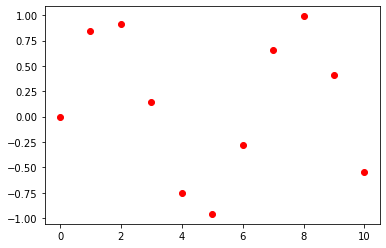

In [2]:
#interpolate
# 插值
# B样条曲线插值
import numpy as np
x = np.linspace(0, 10, 11)
y = np.sin(x)

import pylab as pl
pl.plot(x, y, 'ro')
pl.show

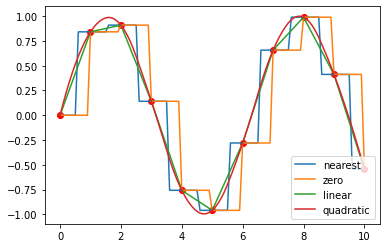

In [6]:
import numpy as np
from scipy import interpolate
import pylab as pl

x = np.linspace(0,10,11)
y = np.sin(x)
pl.plot(x,y,'ro')

xnew = np.linspace(0,10,101)
for kind in ['nearest','zero','linear','quadratic']:
    f = interpolate.interp1d(x,y,kind = kind)
    ynew = f(xnew)
    pl.plot(xnew, ynew, label = str(kind))
pl.legend(loc = 'lower right')
pl.show()

In [8]:
# linalg模块
# 解线性方程组
import numpy as np
from scipy import linalg
import timeit

m,n = 50, 50
A = np.random.rand(m,n)
B = np.random.rand(m,n)
def my_func1():
    x1 = linalg.solve(A,B)
def my_func2():
    x2 = np.dot(linalg.inv(A),B)
t1 = timeit.Timer(stmt=my_func1).timeit(number=100)
t2 = timeit.Timer(stmt=my_func2).timeit(number=100)
print(t1, t2)

0.12888049600041995 0.07790105200001562


In [9]:
# 特征值和特征向量
import numpy as np
from scipy import linalg

A = np.array([[1,-0.3],[-0.1,0.9]])
evalues,evector = linalg.eig(A)
print(evalues)
print(evector)

[1.13027756+0.j 0.76972244+0.j]
[[ 0.91724574  0.79325185]
 [-0.3983218   0.60889368]]


In [10]:
# 奇异值分解SVD
import numpy as np
from scipy import linalg

A = np.array([[1,-0.3],[-0.1,0.9]])
U,s,V = linalg.svd(A)
print(U)
print(s)
print(V)

[[-0.81937847  0.57325293]
 [ 0.57325293  0.81937847]]
[1.16140394 0.74909338]
[[-0.7548655   0.65587962]
 [ 0.65587962  0.7548655 ]]


In [11]:
# 获取stats模块中所有的连续随机变量分布:
from scipy import stats
from scipy import stats
print([k for k,v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)])

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semicircular', 'skewn

In [12]:
# 以正态分布为例，获取默认正态随机变量的期望值和方差
from scipy import stats
print(stats.norm.stats())

(array(0.), array(1.))


In [13]:
X = stats.norm(loc=1.0, scale=2.0)
print(X.stats())

(array(1.), array(4.))


In [17]:
x = X.rvs(size = 10000)#对随机变量取1000个值x
import numpy as np
print(np.mean(x))
print(np.var(x))

1.0084200548910516
4.0545463381120275


In [18]:
#离散概率分布举例
from scipy import stats
x = range(1,7)
p = (1/6,1/6,1/6,1/6,1/6,1/6)
dice = stats.rv_discrete(values=(x,p))
print(dice.rvs(size=20))


[3 5 5 2 2 2 2 3 2 2 6 1 6 1 6 2 5 2 6 3]


In [19]:
#中心极限定律: 大量相互独立的随机变量，其均值的分布以正态分布为极限
import numpy as np
samples = dice.rvs(size=(20000,50))
samples_mean = np.mean(samples, axis=1)
print(samples)
print(samples_mean)

[[1 5 3 ... 1 3 3]
 [4 3 4 ... 3 4 2]
 [3 6 3 ... 2 6 4]
 ...
 [5 5 5 ... 2 3 4]
 [6 5 5 ... 5 2 2]
 [5 1 2 ... 5 2 1]]
[3.3  3.08 3.42 ... 3.56 3.5  3.74]


In [25]:
# 核密度估计
from scipy import stats
import numpy as np
import pylab as pl
x = range(1, 7)
p = (1/6,1/6,1/6,1/6,1/6,1/6)
dice = stats.rv_discrete(values=(x,p))
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis = 1)# 概率平均值
_,bins,step = pl.hist(samples_mean, bins=100, normed=True, histtype="step", label="Histogram")
kde = stats.kde.gaussian_kde(samples_mean)# 核密度估计
x = np.linspace(bins[0],bins[-1],100)
pl.plot(x, kde(x), label="kde")
mean,std = stats.norm.fit(samples_mean)
pl.plot(x, stats.norm(mean,std).pdf(x), alpha=0.8, label="normal fitting")
pl.legend()
pl.show()


AttributeError: 'Polygon' object has no property 'normed'

In [27]:
#计算球体体积
def half_circle(x):
    return (1-x**2)**0.5

In [28]:
import numpy as np
N = 10000
x = np.linspace(-1,1,N)
dx = x[1] - x[0]
y = half_circle(x)
print(dx*np.sum(y)*2)

3.1415893269307373


In [29]:
# 球的体积求解
from scipy import integrate
pi_half, err = integrate.quad(half_circle, -1, 1)
print(pi_half*2)

3.1415926535897967


In [ ]:
# 二重定积分 dblquad()
# 三重定积分 tplquad()


In [31]:
# 球的体积求解
from scipy import integrate
def half_circle(x):
    return (1-x**2)**0.5
def half_sphere(x,y):
    return (1-x**2-y**2)**0.5
volumn, error = integrate.dblquad(half_sphere,-1,1,lambda x: -half_circle(x), lambda x:half_circle(x))
print(volumn, error)

2.0943951023931984 1.0002354500215915e-09


In [37]:
# 解常微分方程
import numpy as np
from scipy import integrate
def lorenz(w,t,a,b,c):
    x,y,x = w.tolist()
    return np.array([a*(y-x), x * (b-z)-y, x*y - c*z])
t = np.arange(0, 30, 0.01)# 创建时间点
track = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))

NameError: name 'odeint' is not defined